In [1]:
###### Applications Lab #3-- ATOC7500 Objective Analysis - eigenfaces
###### last updated February 6, 2018
###### Written by Vineel Yettela, with additional commenting from Jennifer Kay (University of Colorado)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##LEARNING GOALS:
##1) Complete an EOF analysis using Singular Value Decomposition (SVD). 
##2) Provide a qualitative description of the results. 
## What are the eigenvalue, the eigenvector, and the principal component?  
## What do you learn from each one about the space-time structure of your underlying dataset?
##3) Reconstruct the original data using a subset of the EOFs

In [3]:
#load faces. Adapted from the AT&T face database
att_faces = np.load('att_faces.npy')
height, width, n_faces = att_faces.shape
print((height, width, n_faces))

(112, 92, 400)


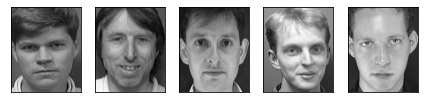

In [4]:
#print a few faces from the database - Look at your data!!
n = 5
fig, axs = plt.subplots(1, n)

random_face_inds = np.random.choice(np.arange(n_faces), n, replace=False)
for i, ax in enumerate(axs):
    ax.imshow(att_faces[:, :, random_face_inds[i]], cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

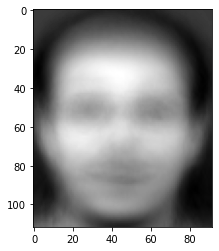

In [6]:
#print the average face
average_face = np.mean(att_faces, axis = 2);
plt.imshow(average_face, cmap = 'gray');

In [7]:
#Construct the data matrix. Samples (different faces) along rows and 
#variables (individual pixels) along columns
print(att_faces.shape)
data_matrix = np.reshape(att_faces, (height*width, n_faces)).T
print(data_matrix.shape)

#Construct anomaly matrix by removing the average face, i.e., 
#by removing the column means from each column of the data_matrix
anomaly_matrix = data_matrix - np.mean(data_matrix, axis=0)
#anomaly_matrix = anomaly_matrix/np.std(anomaly_matrix, axis=0)
[eofs, s, v] = np.linalg.svd(anomaly_matrix.T, full_matrices=False)
print(eofs.shape)

eigenvals = np.square(s)
variance_explained = eigenvals/np.sum(eigenvals)

(112, 92, 400)
(400, 10304)
(10304, 400)


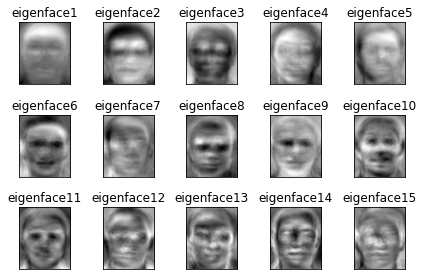

In [8]:
#Plot the top 15 eofs (a.k.a eigenfaces)

fig, axs = plt.subplots(3, 5)

for i, ax in enumerate(np.reshape(axs, 15)):
    eigenface = np.reshape(eofs[:, i], [height, width])
    ax.imshow(eigenface, cmap='gray')
    ax.set_title('eigenface' + str(i+1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

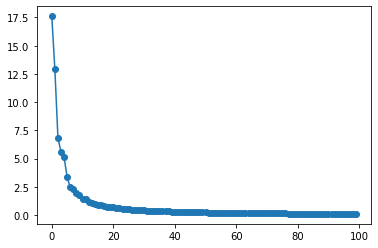

In [9]:
#Plot variance explained by each eigenface
plt.plot(variance_explained[0:100]*100, marker='o')

(400, 400)
(200,)
(112, 92)


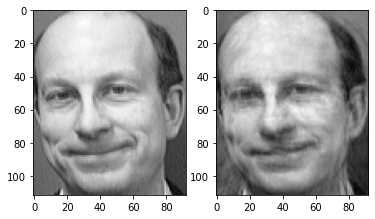

In [11]:
#project the faces onto the eigenfaces
weights = np.dot(anomaly_matrix, eofs)
print(weights.shape)

#choose a face to reconstruct
face_num = 120 #0 to 389
original_face = att_faces[:, :, face_num]

#choose number of weights to reconstruct face
weights_num = 200
face_weights = weights[face_num, 0:weights_num]
print(face_weights.shape)
reconstructed_face = np.dot(eofs[:, 0:weights_num], face_weights)

#At this point, the reconstructed face is an anomaly face with the average face removed. 
#Add back the average face to get the original face

reconstructed_face = np.reshape(reconstructed_face, (height, width)) + average_face
print(reconstructed_face.shape)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(original_face, cmap='gray');
axs[1].imshow(reconstructed_face, cmap='gray');